# Programming Assignment # 4 Clustering

## Student Details

When submitting, fill your full name, your student ID and your NetID in this cell. Note that this is a markdown cell! 

Student Full Name: SIVA KESHAV YALAMANDALA

ID: 1001963510

Team Mate name : JAHNAVI NEKKANTI

ID: 1001725669 

## Rules

1. Work is to be done in a team
2. Any cheating including plagiarism, cooperation will be reported to the corresponding UTA’ s instance.
3. If using any resource (books, internet), please make sure that you cite it.
4. Follow the given structure. Specifically, place all your tasks in THIS NOTEBOOK BUT IN SEPARATE BLOCKS. Then save this notebook as 'yourNetID_pa3.ipynb' and submit it. 
5. Do not alter the dataset name.
6. Please dont ask any details specific to the project like "How to plot XYZ ? What parameters are to be used? " and so on..
7. Report is required for this assignment. Still you need to comment your code. (-10 for no comments in the code.)
8. Please dont send images of your visualizations to verify whether they are right or not before submission deadline.



## Assignment Details

The purpose of this assignment is to cluster  using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


Your dataset is given as 2 files(clustering.csv and college.csv).<br>
Output variable for clustering.csv - Class (<=50K and >50K)<br>
Output variable for college.csv - Grad.Rate (<=50 and >50k)<br>

You need to submit this ipython file after renaming it. 

Preprocessing will be needed for the data as most of the data is in string and needs to be quantified.



In [196]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

# Import required Python packages here
# Seaborn,numpy,pandas,sklearn,matplotlib only
-20 points for the use of libraries other than the above mentioned

In [197]:
#importing all the required packages.
import pandas as sxy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import Normalizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.decomposition import PCA

from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics.pairwise import pairwise_distances



## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

## PRE PROCESSING

In [198]:
#Reading the csv data into data frame 
data_frame = sxy.read_csv('clusteringdata.csv')

#Considering '?' as null values and replacing with nan
data_frame.replace('?', np.nan)

#Dropping null values
data_frame= data_frame.dropna()

#chechking whether do we have any null values or not.
print(data_frame.isnull().sum())

Age                0
WorkClass          0
Fnlwght            0
Education          0
EducationNumber    0
MaritalStatus      0
Occupation         0
Relationship       0
Race               0
Sex                0
CapitalGain        0
CapitalLoss        0
HoursPerWeek       0
NativeCountry      0
Class              0
dtype: int64


In [199]:
data_frame.info()

#TRANSFORMING THE DATA USING LabelEncounter()
cols = ['WorkClass','Education','MaritalStatus','Occupation','Relationship','Race','Sex','NativeCountry','Class']


encoder = LabelEncoder()
for col in cols:
    data_frame[col] = encoder.fit_transform(data_frame[col])

#checking gthe data whether the data is encoded or not.
print(data_frame.info())


#Assigning all the columns expect the target variable to X
#Assigning target variable to Y variable 
X, Y = data_frame.drop(columns=['Class']),data_frame.Class




<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              5000 non-null   int64 
 1   WorkClass        5000 non-null   object
 2   Fnlwght          5000 non-null   int64 
 3   Education        5000 non-null   object
 4   EducationNumber  5000 non-null   int64 
 5   MaritalStatus    5000 non-null   object
 6   Occupation       5000 non-null   object
 7   Relationship     5000 non-null   object
 8   Race             5000 non-null   object
 9   Sex              5000 non-null   object
 10  CapitalGain      5000 non-null   int64 
 11  CapitalLoss      5000 non-null   int64 
 12  HoursPerWeek     5000 non-null   int64 
 13  NativeCountry    5000 non-null   object
 14  Class            5000 non-null   object
dtypes: int64(6), object(9)
memory usage: 625.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Da

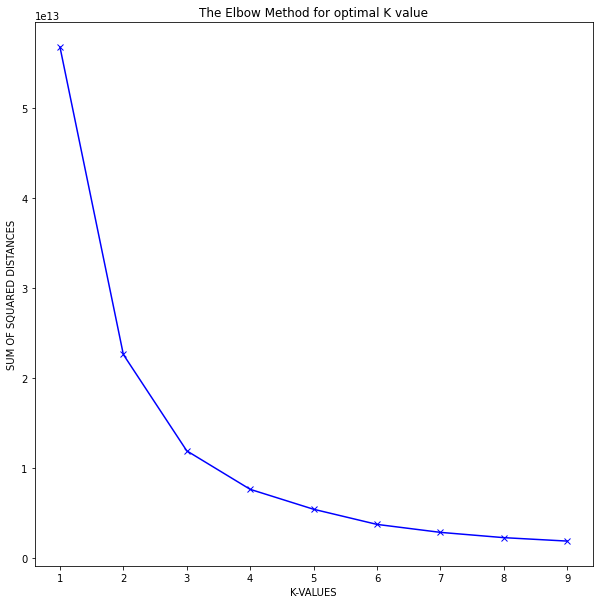

From the above graph, it is observed that there is noticeable decrese in sum of squared values at K=2, Therfore k = 2 will be an optimal value in this case.


In [200]:

#########################begin code for Task 1-a

#########################begin code for Task 1-a
## Describe which is the optimal value for K and explain why you choose it as the optimal value
SumSqEr = []
Kvalue_range = range(1,10)

#Applying K means clustering for differnet K values ranges between 1-9

for kvalue in Kvalue_range:
    Kmeans = KMeans(n_clusters=kvalue)
    Kmeans.fit(data_frame)
    SumSqEr.append(Kmeans.inertia_)



#Plotting the elbow graph for K 1-9
plt.figure(figsize=(10,10))
plt.plot(Kvalue_range, SumSqEr, 'bx-')
plt.xlabel('K-VALUES')
plt.ylabel('SUM OF SQUARED DISTANCES')
plt.title('The Elbow Method for optimal K value')


plt.show()
    
print('From the above graph, it is observed that there is noticeable decrese in sum of squared values at K=2, Therfore k = 2 will be an optimal value in this case.')




### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2 and visualize the predicted training samples and actual training samples on scatter plots. Use 70% of the dataset for training and 30% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



In [201]:
###################begin code for Task 1-b-1: Split the dataset 70% for training and 30% for testing
# random state = 2022
### Important!!!

#Splitting the given data set into 70 percent training and 30 percent testing with random state 2022 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3, random_state=2022)

###################end code for Task 1-b-1

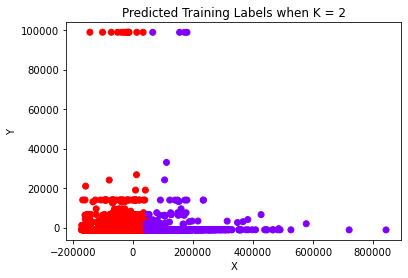

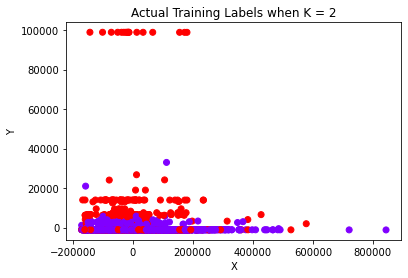

Here we have plotted scatter plots incase of predicted training data and actual training data in the above graphs, red dots represents class variable values that are <=50K and blue dots represents class variable values that are >=50k. From these plots, It can be observed that there are noticable predicted samples that are not matching with actual data. However it can also be observed that the clustering technique has predicted some samples that matches with the actual data.


In [202]:

###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels

# Create the KMeans model
model = KMeans(n_clusters = 2)

# Compute cluster centers and predict cluster index for each sample 
twoClusters = model.fit_predict(X_train)

pca = PCA(n_components = 2)
# Model and fit the data to the PCA model
X_PCA = pca.fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
xaxis = X_PCA[:, 0]
yaxis = X_PCA[:, 1]
#plotting scatter plots for the predicted training labels and the actual training labels
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Predicted Training Labels when K = 2")
plt.scatter(xaxis,yaxis,c=twoClusters,cmap='rainbow')
plt.show()
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Actual Training Labels when K = 2")
plt.scatter(xaxis,yaxis,c=Y_train,cmap='rainbow')
plt.show()

print("Here we have plotted scatter plots incase of predicted training data and actual training data in the above graphs, red dots represents class variable values that are <=50K and blue dots represents class variable values that are >=50k. From these plots, It can be observed that there are noticable predicted samples that are not matching with actual data. However it can also be observed that the clustering technique has predicted some samples that matches with the actual data.")

###################end code for Task 1-b-2


Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

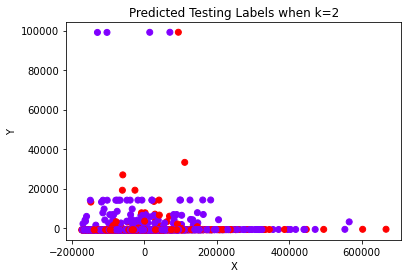

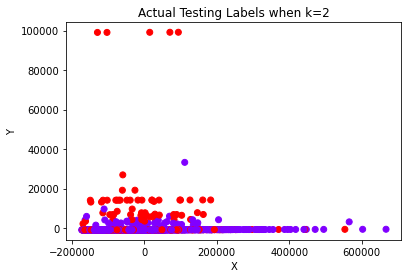

Here we have plotted scatter plots incase of predicted testing data and actual testing data. In the above graphs, red dots represents class variable values that are <=50K and blue dots represents class variable values that are >=50k. From these plots, It can be observed that there are noticable predicted samples that are not matching with actual data. However it can also be observed that samples whose class variable greater than 50K got predicted correctly compared to those samples that are less than 50K.


In [203]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels


# predict cluster index for each sample 
twoClustersTest = model.fit_predict(X_test)
# Model and fit the data to the PCA model
X_PCA_TEST = pca.fit_transform(X_test)

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
xaxis = X_PCA_TEST[:, 0]
yaxis = X_PCA_TEST[:, 1]

plt.xlabel('X')
plt.ylabel('Y')
plt.title("Predicted Testing Labels when k=2")
plt.scatter(xaxis,yaxis,c=cluster2test,cmap='rainbow')
plt.show()
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Actual Testing Labels when k=2")
plt.scatter(xaxis,yaxis,c=Y_test,cmap='rainbow')
plt.show()

print("Here we have plotted scatter plots incase of predicted testing data and actual testing data. In the above graphs, red dots represents class variable values that are <=50K and blue dots represents class variable values that are >=50k. From these plots, It can be observed that there are noticable predicted samples that are not matching with actual data. However it can also be observed that samples whose class variable greater than 50K got predicted correctly compared to those samples that are less than 50K.")

###################end code for Task 1-b-3

In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.

In [204]:
###################begin code for Task 1-b-4: Print out a confusion matrix
#Displaying confusion matrix for training data and testing data.
print("Confusion matrix for training data when K =2 \n")
print(confusion_matrix(Y_train,twoClusters))
print("\nConfusion matrix for testing data when K=2 \n")
print(confusion_matrix(Y_test,twoClustersTest))

###################end code for Task 1-b-4

Confusion matrix for training data when K =2 

[[ 764 1868]
 [ 185  683]]

Confusion matrix for testing data when K=2 

[[302 845]
 [102 251]]


# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [205]:
###################begin code for Task 2-a: Print out a confusion matrix



## Calculate pairwise distance matrix for X_train

cosine = pairwise_distances(X_train,metric='cosine')
euclidean = pairwise_distances(X_train,metric='euclidean')
manhattan = pairwise_distances(X_train,metric='manhattan')

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
completeCosine =  AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage="complete").fit_predict(cosine)

completeConfusionMatrix = confusion_matrix(Y_train,completeCosine)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
completeEuclidean =  AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage="complete").fit_predict(euclidean)
completeEucledianMatrix = confusion_matrix(Y_train,completeEuclidean)
## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
completeManhattan =  AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage="complete").fit_predict(manhattan)
completeManhattanMatrix = confusion_matrix(Y_train,completeManhattan)
## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
avgCosine =  AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage="average").fit_predict(cosine)
averageCosineMatrix = confusion_matrix(Y_train,avgCosine)
## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
avgEuclidean =  AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage="average").fit_predict(euclidean)
averageEucledianMatrix = confusion_matrix(Y_train,avgEuclidean)
## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
avgManhattan =  AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage="average").fit_predict(manhattan)
averageManhattanMatrix = confusion_matrix(Y_train,avgManhattan)
## F1 Scores.
F1Cosine = f1_score(Y_train,completeCosine)
F1Euclidean = f1_score(Y_train,completeEuclidean)
F1Manhattan = f1_score(Y_train,completeManhattan)
F1avgCosine = f1_score(Y_train,avgCosine)
F1avgEuclidean = f1_score(Y_train,avgEuclidean)
F1avgManhattan = f1_score(Y_train,avgManhattan)


print("F1-SCORE: complete linkage + cosine",F1Cosine)
print("F1-SCORE: complete linkage + euclidean", F1Euclidean)
print("F1-SCORE: complete linkage + manhattan",F1Manhattan)
print("F1-SCORE: avg linkage + cosine", F1avgCosine)
print("F1-SCORE: avg linkage + euclidean",F1avgEuclidean)
print("F1-SCORE: avg linkage + manhattan",F1avgManhattan)

print("\nCONFUSION MATRIX FOR COMPLETE LINKAGE + COSINE\n",completeConfusionMatrix)
print("CONFUSION MATRIX FOR COMPLETE LINKAGE + EUCLIDEAN\n",completeEucledianMatrix)
print("CONFUSION MATRIX FOR COMPLETE LINKAGE + MANHATTAN\n",completeManhattanMatrix)
print("CONFUSION MATRIX FOR AVERAGE LINKAGE + COSINE\n",averageCosineMatrix)
print("CONFUSION MATRIX FOR AVERAGE LINKAGE + EUCLIDEAN\n",averageEucledianMatrix)
print("CONFUSION MATRIX FOR AVERAGE LINKAGE + MANHATTAN\n",averageManhattanMatrix)
###################end code for Task 2-a

F1-SCORE: complete linkage + cosine 0.0068886337543053976
F1-SCORE: complete linkage + euclidean 0.01340782122905028
F1-SCORE: complete linkage + manhattan 0.3980537534754402
F1-SCORE: avg linkage + cosine 0.0023014959723820483
F1-SCORE: avg linkage + euclidean 0.3972445464982779
F1-SCORE: avg linkage + manhattan 0.0

CONFUSION MATRIX FOR COMPLETE LINKAGE + COSINE
 [[2632    0]
 [ 865    3]]
CONFUSION MATRIX FOR COMPLETE LINKAGE + EUCLIDEAN
 [[2611   21]
 [ 862    6]]
CONFUSION MATRIX FOR COMPLETE LINKAGE + MANHATTAN
 [[  43 2589]
 [   9  859]]
CONFUSION MATRIX FOR AVERAGE LINKAGE + COSINE
 [[2632    0]
 [ 867    1]]
CONFUSION MATRIX FOR AVERAGE LINKAGE + EUCLIDEAN
 [[  10 2622]
 [   3  865]]
CONFUSION MATRIX FOR AVERAGE LINKAGE + MANHATTAN
 [[2630    2]
 [ 868    0]]


## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

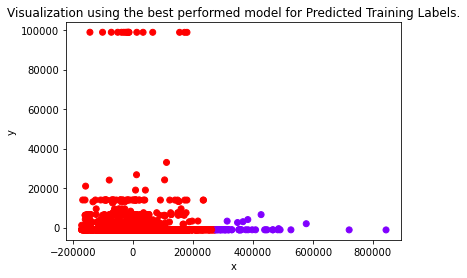

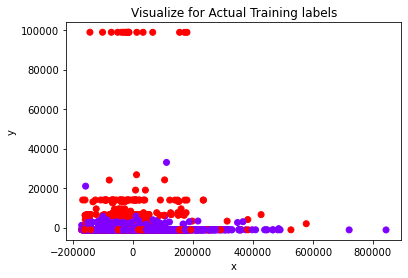

Here we have plotted scatter plots incase of predicted training data and actual training data in the above graphs, red dots represents class variable values that are <=50K and blue dots represents class variable values that are >=50k. From these plots it can be observed that samples whose class variable less than 50K got predicted correctly compared to those samples that are greater than 50K.


In [206]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels

#Storing F1 scores and linkage methods in dictionaries.
Scores = {"completeCosine":F1Cosine,"completeEuclidean":F1Euclidean,
            "completeManhattan":F1Manhattan,"avgCosine":F1avgCosine,
            "avgEuclidean":F1avgEuclidean,"avgManhattan":F1avgManhattan}

linkageMethods = {'completeCosine':completeCosine,
          'completeEuclidean':completeEuclidean,
          'completeManhattan':completeManhattan,
          'avgCosine':avgCosine,
          'avgEuclidean':avgEuclidean,
          'avgManhattan':avgManhattan}

# Maximum value of F1 score
maxLinkage = max(linkages,key=linkages.get)

BestPerformedModel = linkageMethods[maxLinkage]


#  Finding PCA for x_train samples 
X_PCA_TRAIN = pca.fit_transform(X_train)

# Visualize the predicted training labels versus actual training labels. 
xaxis = X_PCA_TRAIN[:,0]
yaxis = X_PCA_TRAIN[:,1]

# plotting predicted training labels.
plt.scatter(xaxis,yaxis,c=BestPerformedModel,cmap="rainbow")
plt.title("Visualization using the best performed model for Predicted Training Labels.")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# plotting actual training labels.
plt.scatter(xaxis,yaxis,c=Y_train,cmap="rainbow")
plt.title("Visualize for Actual Training labels")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print("Here we have plotted scatter plots incase of predicted training data and actual training data in the above graphs, red dots represents class variable values that are <=50K and blue dots represents class variable values that are >=50k. From these plots it can be observed that samples whose class variable less than 50K got predicted correctly compared to those samples that are greater than 50K.")
###################end code for Task 2-b

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

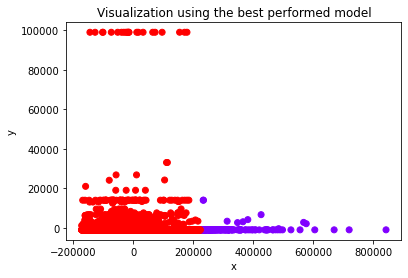

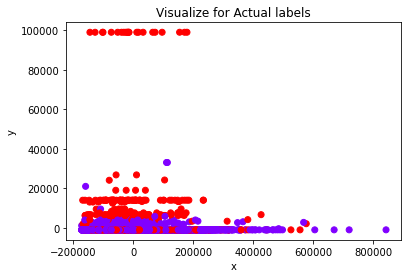

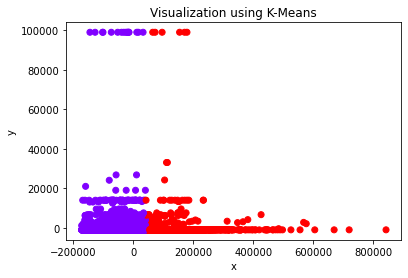

 Here we have plotted scatter plots incase of complete data set for K means clustering, Aglomerative Clustering and actual data. In the above graph , red dots represents class variable values that are <=50K and blue dots represents class variable values that are >=50k.When plotted the whole data in case of both agglomerative and K means, agglomerative scatter plot performed better compared with to K-means labels


In [207]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)
# Create the KMeans model



model = KMeans(n_clusters = 2)

# Compute cluster centers and predict cluster index for each sample 
KMeansCluster = model.fit_predict(X)

cosine = pairwise_distances(X,metric='cosine')
euclidean = pairwise_distances(X,metric='euclidean')
manhattan = pairwise_distances(X,metric='manhattan')

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
completeCosine =  AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage="complete").fit_predict(cosine)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
completeEuclidean =  AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage="complete").fit_predict(euclidean)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
completeManhattan =  AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage="complete").fit_predict(manhattan)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
avgCosine =  AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage="average").fit_predict(cosine)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
avgEuclidean =  AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage="average").fit_predict(euclidean)
## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
avgManhattan =  AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage="average").fit_predict(manhattan)

F1Cosine = f1_score(Y,completeCosine)
F1Euclidean = f1_score(Y,completeEuclidean)
F1Manhattan = f1_score(Y,completeManhattan)
F1avgCosine = f1_score(Y,avgCosine)
F1avgEuclidean = f1_score(Y,avgEuclidean)
F1avgManhattan = f1_score(Y,avgManhattan)
### Agglomerative Clustering
# Calculate pairwise distance matrix for X
Scores = {"completeCosine":F1Cosine,"completeEuclidean":F1Euclidean,
            "completeManhattan":F1Manhattan,"avgCosine":F1avgCosine,
            "avgEuclidean":F1avgEuclidean,"avgManhattan":F1avgManhattan}

linkageMethods = {'completeCosine':completeCosine,
          'completeEuclidean':completeEuclidean,
          'completeManhattan':completeManhattan,
          'avgCosine':avgCosine,
          'avgEuclidean':avgEuclidean,
          'avgManhattan':avgManhattan}





# Maximum value of F1 score
maxLinkage = max(linkages,key=linkages.get)

BestPerformedModel = linkageMethods[maxLinkage]
# then we found which F1 score that maximum values belongs to



#  Finding PCA for x_train samples 
X_PCA = pca.fit_transform(X)

# Visualize the predicted training labels versus actual training labels. 
xaxis = X_PCA[:,0]
yaxis = X_PCA[:,1]

# plotting predicted training labels.
plt.scatter(xaxis,yaxis,c=BestPerformedModel,cmap="rainbow")
plt.title("Visualization using the best performed model")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# plotting actual training labels.
plt.scatter(xaxis,yaxis,c=Y,cmap="rainbow")
plt.title("Visualize for Actual labels")
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 
xaxis = X_PCA[:,0]
yaxis = X_PCA[:,1]

# plotting KMeans using using the best model
plt.scatter(xaxis,yaxis,c=KMeansCluster,cmap="rainbow")
plt.title("Visualization using K-Means")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print(" Here we have plotted scatter plots incase of complete data set for K means clustering, Aglomerative Clustering and actual data. In the above graph , red dots represents class variable values that are <=50K and blue dots represents class variable values that are >=50k.When plotted the whole data in case of both agglomerative and K means, agglomerative scatter plot performed better compared with to K-means labels")

###################end code for Task 3-a

## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model. Type your reasoning.

In [208]:
###################begin code for Task 3-b
print("---------Confusion matrix------------\n")
confusionMatrixKMeans = confusion_matrix(Y,KMeansCluster)
confusionMatrixAgglomerative = confusion_matrix(Y,BestPerformedModel)
print("Kmeans:", confusionMatrixKMeans)
print("\nAgglomerative:", confusionMatrixAgglomerative)

print("\n-----------PrecisionScore---------------\n")
precisionKMeans = precision_score(Y,KMeansCluster)
precisionAgglomerative = precision_score(Y,BestPerformedModel)
print("Kmeans: ", precisionKMeans)
print("\nAgglomerative: ", precisionAgglomerative)


print("\n------------RecallScore-------------\n")
recallKMeans = recall_score(Y,KMeansCluster)
recallAgglomerative = recall_score(Y,BestPerformedModel)
print("Kmeans:", recallKMeans)
print("\nAgglomerative: ", recallAgglomerative)


print("\n-------------F1 Score-------------\n")
F1ScoreKMeans = f1_score(Y, KMeansCluster)
F1ScoreAgglomerative = f1_score(Y,BestPerformedModel)
print("Kmeans: ",F1ScoreKMeans )
print("\nAgglomerative:", F1ScoreAgglomerative )

print("\n \n From the statistics obtained, F1 score of agglomerative testing is high compared to K-Means, so it can be concluded that aggomerative clustering can be implemented for this dataset compared to K-Means")


###################end code for Task 3-b

---------Confusion matrix------------

Kmeans: [[2712 1067]
 [ 927  294]]

Agglomerative: [[ 130 3649]
 [  27 1194]]

-----------PrecisionScore---------------

Kmeans:  0.216017634092579

Agglomerative:  0.24654139995870328

------------RecallScore-------------

Kmeans: 0.24078624078624078

Agglomerative:  0.9778869778869779

-------------F1 Score-------------

Kmeans:  0.22773044151820293

Agglomerative: 0.39379947229551454

 
 From the statistics obtained, F1 score of agglomerative testing is high compared to K-Means, so it can be concluded that aggomerative clustering can be implemented for this dataset compared to K-Means


## Reference

https://www.kaggle.com/mohammadjafarpoor/credit-card-kmeans-gmm-spectral-agglomerative

https://www.kaggle.com/gouthammuthuvel/credit-card-k-means-and-agglomerative-clustering

https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

https://stackoverflow.com/questions/43757977/replacing-values-greater-than-a-number-in-pandas-dataframe

https://www.programcreek.com/python/example/100423/sklearn.metrics.pairwise.pairwise_distances

http://scikit-learn.sourceforge.net/dev/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

https://github.com/scikit-learn/scikit-learn/issues/7689

## Grading 

<b>[05 points] Follow the Rules</b> 


<b>[35 points] Task 1:</b>  

    [10 points] Task 1-a: Determine “k” value from the elbow method

    [25 points] Task 1-b: Visualization for K-Means Clustering

        [02 points] Task 1-b-1: Split the dataset 
    
        [10 points] Task 1-b-2: Visualize the predicted training vs actual training labels 
    
        [10 points] Task 1-b-3: Visualize the predicted testing vs actual testing labels
    
        [03 points] Task 1-b-4: Print out a confusion matrix
    


<b>[45 points] Task 2:</b>  

    [35 points] Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

    [10 points] Task 2-b: Visualization for Hierarchical Agglomerative Clustering



<b>[15 points] Report :</b> 
Make a 4 min video explaining both the assignment and it's implementation.


 <b>[20 points] Task 3 (BONUS):</b> 

    Task 3-a: 10 points

    Task 3-b: 10 points